In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [143]:
listings=pd.read_csv(r"C:\Users\HP\Desktop\Udacity_Nanodegree\Data Science Blog Post\listings.csv")

In [144]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [145]:
reviews=pd.read_csv(r"C:\Users\HP\Desktop\Udacity_Nanodegree\Data Science Blog Post\reviews.csv")

In [146]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [147]:
#Finfing the number of missing values in listings dataset
listings.isnull().sum()

id                                     0
listing_url                            0
scrape_id                              0
last_scraped                           0
name                                   0
summary                              177
space                                569
description                            0
experiences_offered                    0
neighborhood_overview               1032
notes                               1606
transit                              934
thumbnail_url                        320
medium_url                           320
picture_url                            0
xl_picture_url                       320
host_id                                0
host_url                               0
host_name                              2
host_since                             2
host_location                          8
host_about                           859
host_response_time                   523
host_response_rate                   523
host_acceptance_

In [148]:
#Let us see the % missing values in each column
listings.isnull().sum()/listings.shape[0]

id                                  0.000000
listing_url                         0.000000
scrape_id                           0.000000
last_scraped                        0.000000
name                                0.000000
summary                             0.046359
space                               0.149031
description                         0.000000
experiences_offered                 0.000000
neighborhood_overview               0.270299
notes                               0.420639
transit                             0.244631
thumbnail_url                       0.083814
medium_url                          0.083814
picture_url                         0.000000
xl_picture_url                      0.083814
host_id                             0.000000
host_url                            0.000000
host_name                           0.000524
host_since                          0.000524
host_location                       0.002095
host_about                          0.224987
host_respo

In [149]:
#Let us see the number of missing values in each row
listings.isnull().sum(axis=1)

0       13
1        2
2        7
3       25
4        8
5        7
6        4
7        3
8        7
9        2
10       4
11       3
12       4
13       4
14       4
15      11
16       4
17       5
18      23
19       9
20       9
21       3
22      10
23      19
24      12
25       7
26      17
27       3
28       8
29       5
        ..
3788     2
3789     3
3790     5
3791     2
3792    20
3793     5
3794     3
3795     7
3796     6
3797     7
3798     4
3799     9
3800    19
3801     3
3802    20
3803     5
3804     3
3805     4
3806    11
3807     8
3808     4
3809     4
3810     1
3811     6
3812     3
3813     8
3814     4
3815    23
3816    19
3817    21
Length: 3818, dtype: int64

In [150]:
#Also, let us the % missing values per row in the reviews dataset
listings.isnull().sum(axis=1)/listings.shape[1]

0       0.141304
1       0.021739
2       0.076087
3       0.271739
4       0.086957
5       0.076087
6       0.043478
7       0.032609
8       0.076087
9       0.021739
10      0.043478
11      0.032609
12      0.043478
13      0.043478
14      0.043478
15      0.119565
16      0.043478
17      0.054348
18      0.250000
19      0.097826
20      0.097826
21      0.032609
22      0.108696
23      0.206522
24      0.130435
25      0.076087
26      0.184783
27      0.032609
28      0.086957
29      0.054348
          ...   
3788    0.021739
3789    0.032609
3790    0.054348
3791    0.021739
3792    0.217391
3793    0.054348
3794    0.032609
3795    0.076087
3796    0.065217
3797    0.076087
3798    0.043478
3799    0.097826
3800    0.206522
3801    0.032609
3802    0.217391
3803    0.054348
3804    0.032609
3805    0.043478
3806    0.119565
3807    0.086957
3808    0.043478
3809    0.043478
3810    0.010870
3811    0.065217
3812    0.032609
3813    0.086957
3814    0.043478
3815    0.2500

In [151]:
#Lets see the number of rows and columns in the listings dataset
listings.shape

(3818, 92)

In [152]:
#Let us see the number of missing values in the every column of the reviews dataset
reviews.isnull().sum()

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         17
dtype: int64

In [153]:
#Let us see the % missing values in each column
reviews.isnull().sum()/reviews.shape[0]

listing_id       0.0000
id               0.0000
date             0.0000
reviewer_id      0.0000
reviewer_name    0.0000
comments         0.0002
dtype: float64

In [154]:
reviews.isnull().sum(axis=1)

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
84819    0
84820    0
84821    0
84822    0
84823    0
84824    0
84825    0
84826    0
84827    0
84828    0
84829    0
84830    0
84831    0
84832    0
84833    0
84834    0
84835    0
84836    0
84837    0
84838    0
84839    0
84840    0
84841    0
84842    0
84843    0
84844    0
84845    0
84846    0
84847    0
84848    0
Length: 84849, dtype: int64

In [155]:
#Let us see the % missing values in each row
reviews.isnull().sum(axis=1)/reviews.shape[1]

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
5        0.0
6        0.0
7        0.0
8        0.0
9        0.0
10       0.0
11       0.0
12       0.0
13       0.0
14       0.0
15       0.0
16       0.0
17       0.0
18       0.0
19       0.0
20       0.0
21       0.0
22       0.0
23       0.0
24       0.0
25       0.0
26       0.0
27       0.0
28       0.0
29       0.0
        ... 
84819    0.0
84820    0.0
84821    0.0
84822    0.0
84823    0.0
84824    0.0
84825    0.0
84826    0.0
84827    0.0
84828    0.0
84829    0.0
84830    0.0
84831    0.0
84832    0.0
84833    0.0
84834    0.0
84835    0.0
84836    0.0
84837    0.0
84838    0.0
84839    0.0
84840    0.0
84841    0.0
84842    0.0
84843    0.0
84844    0.0
84845    0.0
84846    0.0
84847    0.0
84848    0.0
Length: 84849, dtype: float64

In [156]:
#Let us see the number of rows and columns in the reviews dataset
reviews.shape

(84849, 6)

In [157]:
#Q2 What are the features that lead to a better rating for a listing

In [158]:
#For this purpose,we will have to take the listings dataset and see which columns we would be using in our analysis and which columns would we 
#dropping

In [159]:
#Choosing which columns to take from the 92 columns hat we have in our dataset
#'name','summary','description','host_response_time','host_response_rate','host_acceptance_rate','host_is_superhost','neighbourhood_cleansed','zipcode','property_type','room_type','accommodates','bathrooms','bedrooms','beds','bed_type','amenities','price','weekly_price','monthly_price','security_deposit','cleaning_fee','guests_included','extra_people','minimum_nights','maximum_nights','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','instant_bookable','cancellation_policy'

In [160]:
listings_clean=listings.loc[:,['name','summary','description','host_response_time','host_response_rate','host_acceptance_rate','host_is_superhost','neighbourhood_cleansed','zipcode','property_type','room_type','accommodates','bathrooms','bedrooms','beds','bed_type','amenities','price','weekly_price','monthly_price','security_deposit','cleaning_fee','guests_included','extra_people','minimum_nights','maximum_nights','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','instant_bookable','cancellation_policy']]

In [161]:
listings_clean.dtypes

name                            object
summary                         object
description                     object
host_response_time              object
host_response_rate              object
host_acceptance_rate            object
host_is_superhost               object
neighbourhood_cleansed          object
zipcode                         object
property_type                   object
room_type                       object
accommodates                     int64
bathrooms                      float64
bedrooms                       float64
beds                           float64
bed_type                        object
amenities                       object
price                           object
weekly_price                    object
monthly_price                   object
security_deposit                object
cleaning_fee                    object
guests_included                  int64
extra_people                    object
minimum_nights                   int64
maximum_nights           

In [162]:
listings_clean.head()

,name,summary,description,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,neighbourhood_cleansed,zipcode,property_type,...,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy
0,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,within a few hours,96%,100%,f,West Queen Anne,98119,Apartment,...,365,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,moderate
1,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,Chemically sensitive? We've removed the irrita...,within an hour,98%,100%,t,West Queen Anne,98119,Apartment,...,90,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,strict
2,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,New modern house built in 2013. Spectacular s...,within a few hours,67%,100%,f,West Queen Anne,98119,House,...,30,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,strict
3,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,A charming apartment that sits atop Queen Anne...,NaN,NaN,NaN,f,West Queen Anne,98119,Apartment,...,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,flexible
4,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,within an hour,100%,NaN,f,West Queen Anne,98119,House,...,1125,92.0,9.0,9.0,10.0,10.0,9.0,9.0,f,strict


In [163]:
#Lets remove the % sign from the host_response_rate and host_acceptance_rate columns
listings_clean['host_response_rate']=listings_clean['host_response_rate'].str.replace('%','')
listings_clean['host_acceptance_rate']=listings_clean['host_acceptance_rate'].str.replace('%','')

In [164]:
#Converting host_response_rate and host_acceptance rate to float type
listings_clean['host_response_rate']=listings_clean['host_response_rate'].astype('float64')/100
listings_clean['host_acceptance_rate']=listings_clean['host_acceptance_rate'].astype('float64')/100
#Filling the missing values with 0
listings_clean['host_response_rate'].fillna(0,inplace=True)
listings_clean['host_acceptance_rate'].fillna(0,inplace=True)

In [165]:
#Converting the columns with binomial values 
#Let us  replace f with 0 and t with 1 in host_is_superhost column
listings_clean['host_is_superhost']=listings_clean['host_is_superhost'].str.replace('f','0')
listings_clean['host_is_superhost']=listings_clean['host_is_superhost'].str.replace('t','1')
listings_clean['instant_bookable']=listings_clean['instant_bookable'].str.replace('f','0')
listings_clean['instant_bookable']=listings_clean['instant_bookable'].str.replace('t','1')

In [166]:
#Converting these two coumns as well to float and converting it from percentage to number
listings_clean['host_is_superhost']=listings_clean['host_is_superhost'].astype('float64')
listings_clean['instant_bookable']=listings_clean['instant_bookable'].astype('float64')
#Filling the missing values with 0
listings_clean['host_is_superhost'].fillna(0,inplace=True)
listings_clean['instant_bookable'].fillna(0,inplace=True)

In [167]:
listings_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 35 columns):
name                           3818 non-null object
summary                        3641 non-null object
description                    3818 non-null object
host_response_time             3295 non-null object
host_response_rate             3818 non-null float64
host_acceptance_rate           3818 non-null float64
host_is_superhost              3818 non-null float64
neighbourhood_cleansed         3818 non-null object
zipcode                        3811 non-null object
property_type                  3817 non-null object
room_type                      3818 non-null object
accommodates                   3818 non-null int64
bathrooms                      3802 non-null float64
bedrooms                       3812 non-null float64
beds                           3817 non-null float64
bed_type                       3818 non-null object
amenities                      3818 non-null object
pric

In [168]:
#Let us see first few rows of price,weekly price,monthly price,security deposit and cleaning fee
df=listings_clean.loc[:,['price','weekly_price','monthly_price','security_deposit','cleaning_fee','extra_people']]
df.head()

,price,weekly_price,monthly_price,security_deposit,cleaning_fee,extra_people
0,$85.00,NaN,NaN,NaN,NaN,$5.00
1,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,$0.00
2,$975.00,NaN,NaN,"$1,000.00",$300.00,$25.00
3,$100.00,$650.00,"$2,300.00",NaN,NaN,$0.00
4,$450.00,NaN,NaN,$700.00,$125.00,$15.00


In [169]:
#We can see that these all columns are strings and have $ sign.We need to remove the $ sign and convert the type to float
listings_clean['price']=listings_clean['price'].str.replace('$','')
listings_clean['weekly_price']=listings_clean['weekly_price'].str.replace('$','')
listings_clean['monthly_price']=listings_clean['monthly_price'].str.replace('$','')
listings_clean['security_deposit']=listings_clean['security_deposit'].str.replace('$','')
listings_clean['cleaning_fee']=listings_clean['cleaning_fee'].str.replace('$','')
listings_clean['extra_people']=listings_clean['extra_people'].str.replace('$','')

In [170]:
#Also,removing the commas as well
listings_clean['price']=listings_clean['price'].str.replace(',','')
listings_clean['weekly_price']=listings_clean['weekly_price'].str.replace(',','')
listings_clean['monthly_price']=listings_clean['monthly_price'].str.replace(',','')
listings_clean['security_deposit']=listings_clean['security_deposit'].str.replace(',','')
listings_clean['cleaning_fee']=listings_clean['cleaning_fee'].str.replace(',','')
listings_clean['extra_people']=listings_clean['extra_people'].str.replace(',','')


In [171]:
listings_clean['price']=listings_clean['price'].astype('float64')
listings_clean['weekly_price']=listings_clean['weekly_price'].astype('float64')
listings_clean['monthly_price']=listings_clean['monthly_price'].astype('float64')
listings_clean['security_deposit']=listings_clean['security_deposit'].astype('float64')
listings_clean['cleaning_fee']=listings_clean['cleaning_fee'].astype('float64')
listings_clean['extra_people']=listings_clean['extra_people'].astype('float64')



In [172]:
listings_clean['price'].fillna(0,inplace=True)
listings_clean['weekly_price'].fillna(0,inplace=True)
listings_clean['monthly_price'].fillna(0,inplace=True)
listings_clean['security_deposit'].fillna(0,inplace=True)
listings_clean['cleaning_fee'].fillna(0,inplace=True)
listings_clean['extra_people'].fillna(0,inplace=True)

In [173]:
listings_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 35 columns):
name                           3818 non-null object
summary                        3641 non-null object
description                    3818 non-null object
host_response_time             3295 non-null object
host_response_rate             3818 non-null float64
host_acceptance_rate           3818 non-null float64
host_is_superhost              3818 non-null float64
neighbourhood_cleansed         3818 non-null object
zipcode                        3811 non-null object
property_type                  3817 non-null object
room_type                      3818 non-null object
accommodates                   3818 non-null int64
bathrooms                      3802 non-null float64
bedrooms                       3812 non-null float64
beds                           3817 non-null float64
bed_type                       3818 non-null object
amenities                      3818 non-null object
pric

In [174]:
#Let us see the ameneties column
listings_clean['amenities']=listings_clean['amenities'].str.replace("{","")
listings_clean['amenities']=listings_clean['amenities'].str.replace("}","")
listings_clean['amenities']=listings_clean['amenities'].str.replace(" ","")
listings_clean['amenities']=listings_clean['amenities'].str.replace('"','')
listings_clean['amenities']=listings_clean['amenities'].str.replace(",","  ")
listings_clean['amenities']

0       TV  CableTV  Internet  WirelessInternet  AirCo...
1       TV  Internet  WirelessInternet  Kitchen  FreeP...
2       TV  CableTV  Internet  WirelessInternet  AirCo...
3       Internet  WirelessInternet  Kitchen  IndoorFir...
4       TV  CableTV  Internet  WirelessInternet  Kitch...
5       WirelessInternet  FreeParkingonPremises  Heati...
6       WirelessInternet  FreeParkingonPremises  Heati...
7       WirelessInternet  Petsliveonthisproperty  Dog(...
8       TV  CableTV  Internet  WirelessInternet  Kitch...
9       TV  Internet  WirelessInternet  Kitchen  FreeP...
10      TV  CableTV  Internet  WirelessInternet  Kitch...
11      TV  CableTV  WirelessInternet  Kitchen  FreePa...
12      TV  CableTV  Internet  WirelessInternet  Kitch...
13      TV  CableTV  Internet  WirelessInternet  Kitch...
14      TV  CableTV  Internet  WirelessInternet  Kitch...
15      TV  CableTV  Internet  Kitchen  FreeParkingonP...
16      Internet  WirelessInternet  PetsAllowed  Break...
17      Wirele

In [102]:
#Now let us deal with the columns which have string values
# such as name,summary,description and amenities
#Name,summary and desription are not the faetures that would impact the rating.So,let us drop them as well
#We will also drop zipcode since we have neighbourhood column that we can use for our analysis
listings_clean=listings_clean.drop(['name','summary','description','zipcode'],axis=1)


In [103]:
#Let us try to plot the review score rating with respect to the neighbourhood
listings_subset=listings_clean.loc[:,['neighbourhood_cleansed','review_scores_rating']]
listings_grouped=listings_subset.groupby('neighbourhood_cleansed',as_index=False).mean().sort_values(by=['review_scores_rating'],ascending=False)
listings_top_ten=listings_grouped.nlargest(10,['review_scores_rating'])
listings_top_ten

,neighbourhood_cleansed,review_scores_rating
2,Arbor Heights,98.000000
64,Riverview,97.250000
73,Southeast Magnolia,97.214286
41,Madrona,97.100000
28,Harrison/Denny-Blaine,97.083333
23,Genesee,96.933333
51,North Beach/Blue Ridge,96.909091
35,Laurelhurst,96.777778
84,Whittier Heights,96.666667
54,North Delridge,96.600000


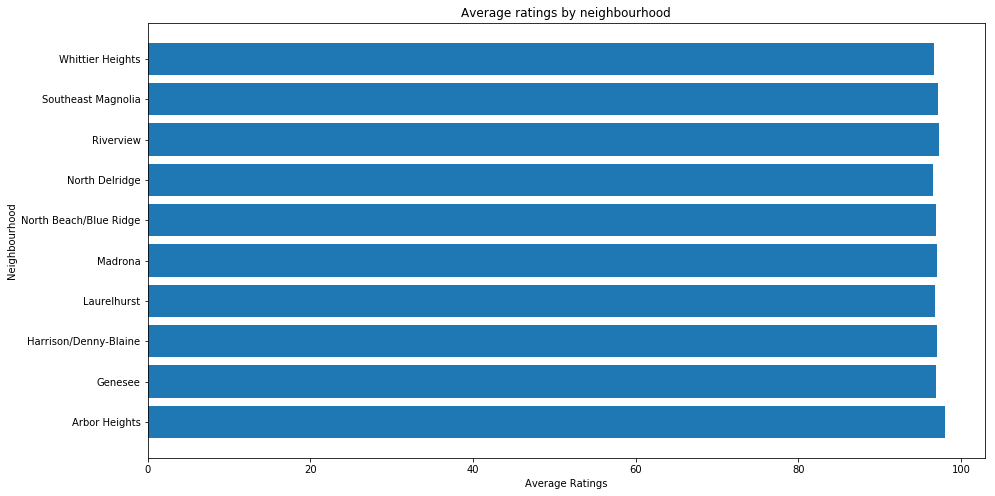

In [104]:
plt.figure(figsize=(15,8))
plt.barh(listings_top_ten['neighbourhood_cleansed'],listings_top_ten['review_scores_rating'])
plt.title('Average ratings by neighbourhood')
plt.xlabel('Average Ratings')
plt.ylabel('Neighbourhood')
plt.show()


In [105]:
#Let us see the number of unique values in the column priperty_type
listings_clean['property_type'].unique()

array(['Apartment', 'House', 'Cabin', 'Condominium', 'Camper/RV',
       'Bungalow', 'Townhouse', 'Loft', 'Boat', 'Bed & Breakfast', 'Other',
       'Dorm', 'Treehouse', 'Yurt', 'Chalet', 'Tent', nan], dtype=object)

In [106]:
#Now,here we have a lot of values,let us try to recode them into 6 categories
#Apartment,House,Cabin,Condominium,Bungalow and Townhouse
def assign(val):
    if val not in ['House','Apartment','Cabin','Condominium','Bungalow','Townhouse']:
        return 'Other'
    return val

listings_clean['property_type']=listings_clean['property_type'].apply(assign)

In [107]:
#Let us see if the recoding has been done properly or not
listings_clean['property_type'].unique()

array(['Apartment', 'House', 'Cabin', 'Condominium', 'Other', 'Bungalow',
       'Townhouse'], dtype=object)

In [108]:
#Let us also see the unique values in room_type column 
listings_clean['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [109]:
#Just three categories here.So,let us keep them column as it is

In [110]:
#Let us also see the bed_type column
listings_clean['bed_type'].unique()

array(['Real Bed', 'Futon', 'Pull-out Sofa', 'Airbed', 'Couch'], dtype=object)

In [111]:
#Let us recode the bed_type column as well and put them in two categories:bed and other
def assign1(val):
    if val not in ['Real Bed']:
        return 'Other'
    return val


listings_clean['bed_type']=listings_clean['bed_type'].apply(assign1)

In [112]:
#Let us see if the recoding has ben done or not
listings_clean['bed_type'].unique()

array(['Real Bed', 'Other'], dtype=object)

In [113]:
#Let us also try to analyse the REspose_Time columnm
listings_clean['host_response_time'].unique()

array(['within a few hours', 'within an hour', nan, 'within a day',
       'a few days or more'], dtype=object)

In [114]:
#Converting these categories to integer values
listings_clean['host_response_time'].replace('within an hour',1, inplace=True)
listings_clean['host_response_time'].replace('within a few hours',2,inplace=True)
listings_clean['host_response_time'].replace('within a day',3,inplace=True)
listings_clean['host_response_time'].replace('a few days or more',4,inplace=True)


In [115]:
#Filling the missing values of this column as well
listings_clean['host_response_time'].fillna(method='ffill',inplace=True)

In [116]:
#Let us see the info of the dataframe
listings_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 31 columns):
host_response_time             3818 non-null float64
host_response_rate             3818 non-null float64
host_acceptance_rate           3818 non-null float64
host_is_superhost              3818 non-null float64
neighbourhood_cleansed         3818 non-null object
property_type                  3818 non-null object
room_type                      3818 non-null object
accommodates                   3818 non-null int64
bathrooms                      3802 non-null float64
bedrooms                       3812 non-null float64
beds                           3817 non-null float64
bed_type                       3818 non-null object
amenities                      3818 non-null object
price                          3818 non-null float64
weekly_price                   3818 non-null float64
monthly_price                  3818 non-null float64
security_deposit               3818 non-null float64

In [117]:
#Let us also treat missing values of some other columns
listings_clean['beds'].fillna(method='ffill',inplace=True)
listings_clean['bathrooms'].fillna(method='ffill',inplace=True)
listings_clean['bedrooms'].fillna(method='ffill',inplace=True)

In [118]:
#Let us also replace the columns ameneties with ameneties lenght as the number of ameneties can be associated with the length of the string in this column
listings_clean['amenities_length']=listings_clean['amenities'].str.len()
listings_clean=listings_clean.drop(['amenities'],axis=1)

In [119]:
listings_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 31 columns):
host_response_time             3818 non-null float64
host_response_rate             3818 non-null float64
host_acceptance_rate           3818 non-null float64
host_is_superhost              3818 non-null float64
neighbourhood_cleansed         3818 non-null object
property_type                  3818 non-null object
room_type                      3818 non-null object
accommodates                   3818 non-null int64
bathrooms                      3818 non-null float64
bedrooms                       3818 non-null float64
beds                           3818 non-null float64
bed_type                       3818 non-null object
price                          3818 non-null float64
weekly_price                   3818 non-null float64
monthly_price                  3818 non-null float64
security_deposit               3818 non-null float64
cleaning_fee                   3818 non-null float6

In [120]:
#Now let us remove all the rows from the dataframe where we do not have our respose variable review_score_rating
listings_clean=listings_clean[listings_clean['review_scores_rating'].isnull()==0]

In [121]:
#Let us take all the numerical coulmns and see the correlation between them
col=['int64','float64']
listings_clean_numeric=listings_clean .select_dtypes(include=col)
listings_clean_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3171 entries, 0 to 3814
Data columns (total 26 columns):
host_response_time             3171 non-null float64
host_response_rate             3171 non-null float64
host_acceptance_rate           3171 non-null float64
host_is_superhost              3171 non-null float64
accommodates                   3171 non-null int64
bathrooms                      3171 non-null float64
bedrooms                       3171 non-null float64
beds                           3171 non-null float64
price                          3171 non-null float64
weekly_price                   3171 non-null float64
monthly_price                  3171 non-null float64
security_deposit               3171 non-null float64
cleaning_fee                   3171 non-null float64
guests_included                3171 non-null int64
extra_people                   3171 non-null float64
minimum_nights                 3171 non-null int64
maximum_nights                 3171 non-null int64


In [122]:
#Let us see how these columns are correlated to each other
listings_clean_numeric.corr()


,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,accommodates,bathrooms,bedrooms,beds,price,weekly_price,...,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,amenities_length
host_response_time,1.000000,-0.200426,-0.123862,-0.155169,0.053870,0.028025,0.080800,0.028820,0.090766,0.018312,...,-0.005918,-0.097097,-0.065480,-0.109392,-0.064917,-0.081838,-0.052179,-0.099000,-0.256144,-0.141477
host_response_rate,-0.200426,1.000000,0.698217,0.150907,0.013029,-0.013927,-0.058201,0.012870,-0.112239,-0.011232,...,-0.054280,0.049829,0.052837,0.095328,0.026567,0.029193,0.041372,0.055874,0.112930,0.142344
host_acceptance_rate,-0.123862,0.698217,1.000000,0.133112,0.003875,-0.041655,-0.079782,0.001408,-0.151918,-0.055773,...,-0.039556,0.008643,0.010656,0.039106,-0.023370,-0.030261,0.025658,0.028775,0.101765,0.124922
host_is_superhost,-0.155169,0.150907,0.133112,1.000000,-0.026338,-0.018085,-0.041232,-0.040794,0.005096,0.051218,...,-0.032452,0.240895,0.215256,0.230263,0.166301,0.162025,0.126054,0.221285,0.071258,0.094293
accommodates,0.053870,0.013029,0.003875,-0.026338,1.000000,0.526793,0.770186,0.861727,0.648382,0.305610,...,0.008894,-0.013101,-0.049665,0.011646,-0.019664,-0.013208,-0.037520,-0.062041,0.028825,0.262140
bathrooms,0.028025,-0.013927,-0.041655,-0.018085,0.526793,1.000000,0.604431,0.527210,0.509525,0.214865,...,-0.012477,0.044645,-0.006297,0.017079,-0.003699,-0.016998,-0.008709,0.014402,-0.046616,0.124997
bedrooms,0.080800,-0.058201,-0.079782,-0.041232,0.770186,0.604431,1.000000,0.752361,0.627782,0.300489,...,-0.005759,0.024235,-0.011550,-0.006658,0.010652,0.001255,-0.028692,-0.000121,-0.063960,0.165126
beds,0.028820,0.012870,0.001408,-0.040794,0.861727,0.527210,0.752361,1.000000,0.584570,0.254771,...,-0.006770,-0.000720,-0.052767,0.004732,-0.021963,-0.013373,-0.023734,-0.029102,0.030608,0.215958
price,0.090766,-0.112239,-0.151918,0.005096,0.648382,0.509525,0.627782,0.584570,1.000000,0.411623,...,-0.002336,0.055551,0.019026,0.054357,0.007877,0.012990,0.075069,-0.041776,-0.022769,0.171919
weekly_price,0.018312,-0.011232,-0.055773,0.051218,0.305610,0.214865,0.300489,0.254771,0.411623,1.000000,...,0.036644,0.031977,0.015279,0.029985,0.024746,-0.001030,0.020215,-0.022184,-0.001421,0.135732


In [123]:
#Let us plot the correlation 
corr = listings_clean_numeric.corr()
corr.style.background_gradient(cmap='coolwarm')

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,accommodates,bathrooms,bedrooms,beds,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,amenities_length
host_response_time,1,-0.200426,-0.123862,-0.155169,0.0538696,0.0280254,0.0807996,0.0288197,0.0907658,0.0183119,-0.0413096,-0.0383826,0.0556475,-0.020861,-0.00411348,0.010998,-0.00591848,-0.0970966,-0.0654797,-0.109392,-0.0649171,-0.0818375,-0.0521786,-0.0989999,-0.256144,-0.141477
host_response_rate,-0.200426,1,0.698217,0.150907,0.0130288,-0.0139266,-0.0582014,0.0128698,-0.112239,-0.0112323,0.0690798,-0.025748,0.00302616,0.0397231,-0.00405323,0.0030868,-0.05428,0.0498285,0.0528372,0.0953275,0.0265665,0.0291934,0.0413724,0.055874,0.11293,0.142344
host_acceptance_rate,-0.123862,0.698217,1,0.133112,0.00387466,-0.041655,-0.0797821,0.00140786,-0.151918,-0.0557732,0.0533202,-0.0319934,-0.0121268,0.00577113,-0.0200695,-0.00418875,-0.0395565,0.00864267,0.0106563,0.039106,-0.0233704,-0.0302609,0.025658,0.0287745,0.101765,0.124922
host_is_superhost,-0.155169,0.150907,0.133112,1,-0.026338,-0.0180851,-0.0412323,-0.0407941,0.00509605,0.0512176,0.0936275,0.0389275,-0.0158697,0.0346338,0.0186675,-0.0068255,-0.0324516,0.240895,0.215256,0.230263,0.166301,0.162025,0.126054,0.221285,0.0712583,0.0942926
accommodates,0.0538696,0.0130288,0.00387466,-0.026338,1,0.526793,0.770186,0.861727,0.648382,0.30561,0.255305,0.314415,0.640941,0.54422,0.142475,0.015401,0.008894,-0.0131008,-0.0496649,0.0116462,-0.0196637,-0.0132079,-0.0375198,-0.0620412,0.0288249,0.26214
bathrooms,0.0280254,-0.0139266,-0.041655,-0.0180851,0.526793,1,0.604431,0.52721,0.509525,0.214865,0.136759,0.225318,0.446521,0.300843,0.066678,0.00288434,-0.0124769,0.0446451,-0.00629735,0.0170791,-0.00369895,-0.0169981,-0.00870876,0.0144023,-0.0466164,0.124997
bedrooms,0.0807996,-0.0582014,-0.0797821,-0.0412323,0.770186,0.604431,1,0.752361,0.627782,0.300489,0.216004,0.304258,0.575839,0.468074,0.101956,0.009775,-0.00575859,0.0242348,-0.0115499,-0.00665816,0.0106523,0.00125508,-0.0286919,-0.000120968,-0.06396,0.165126
beds,0.0288197,0.0128698,0.00140786,-0.0407941,0.861727,0.52721,0.752361,1,0.58457,0.254771,0.204019,0.293065,0.599922,0.476172,0.129696,-0.000820951,-0.00676992,-0.000720366,-0.0527674,0.00473212,-0.0219626,-0.0133733,-0.023734,-0.0291017,0.030608,0.215958
price,0.0907658,-0.112239,-0.151918,0.00509605,0.648382,0.509525,0.627782,0.58457,1,0.411623,0.29255,0.348246,0.590014,0.415353,0.130667,0.0181667,-0.00233605,0.0555512,0.0190256,0.0543571,0.00787708,0.0129897,0.0750685,-0.0417763,-0.0227693,0.171919
weekly_price,0.0183119,-0.0112323,-0.0557732,0.0512176,0.30561,0.214865,0.300489,0.254771,0.411623,1,0.668006,0.305269,0.297512,0.24717,0.132549,0.000383609,0.0366439,0.031977,0.015279,0.0299846,0.0247457,-0.0010299,0.0202155,-0.0221843,-0.00142123,0.135732


In [124]:
#Let us see how the review_scores_rating is correlated to the other columns
corr['review_scores_rating'].sort_values(ascending=False)

review_scores_rating           1.000000
review_scores_value            0.696534
review_scores_cleanliness      0.642882
review_scores_accuracy         0.621257
review_scores_communication    0.540620
review_scores_checkin          0.521813
review_scores_location         0.368423
host_is_superhost              0.240895
amenities_length               0.154185
price                          0.055551
host_response_rate             0.049829
bathrooms                      0.044645
weekly_price                   0.031977
bedrooms                       0.024235
security_deposit               0.023587
host_acceptance_rate           0.008643
instant_bookable               0.006071
minimum_nights                 0.001392
beds                          -0.000720
guests_included               -0.001430
cleaning_fee                  -0.004638
monthly_price                 -0.008351
accommodates                  -0.013101
maximum_nights                -0.031313
extra_people                  -0.035063


In [125]:
#From the above we can say that the rating subscore is related to the overall rating..That is logical as they are a part of the overall rating acore
#The other feature that are highly correlated to the rating are:
#1 host_is_superhost
#2 amenities_length 
#3 price
#4 host_response rate

In [126]:
#Let us so some additional preprocessing on the data 
listings_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3171 entries, 0 to 3814
Data columns (total 31 columns):
host_response_time             3171 non-null float64
host_response_rate             3171 non-null float64
host_acceptance_rate           3171 non-null float64
host_is_superhost              3171 non-null float64
neighbourhood_cleansed         3171 non-null object
property_type                  3171 non-null object
room_type                      3171 non-null object
accommodates                   3171 non-null int64
bathrooms                      3171 non-null float64
bedrooms                       3171 non-null float64
beds                           3171 non-null float64
bed_type                       3171 non-null object
price                          3171 non-null float64
weekly_price                   3171 non-null float64
monthly_price                  3171 non-null float64
security_deposit               3171 non-null float64
cleaning_fee                   3171 non-null float6

In [127]:
listings_clean=pd.get_dummies(listings_clean,columns=['cancellation_policy','room_type','property_type','bed_type','neighbourhood_cleansed'])

In [128]:
#Also,since we are taking the review_scores_rating as our target column,we will be dropping other subscores such as rating,accuracy etc
listings_rating=listings_clean.drop(['review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value'],axis=1)

In [129]:
listings_rating.isnull().sum()

host_response_time                            0
host_response_rate                            0
host_acceptance_rate                          0
host_is_superhost                             0
accommodates                                  0
bathrooms                                     0
bedrooms                                      0
beds                                          0
price                                         0
weekly_price                                  0
monthly_price                                 0
security_deposit                              0
cleaning_fee                                  0
guests_included                               0
extra_people                                  0
minimum_nights                                0
maximum_nights                                0
review_scores_rating                          0
instant_bookable                              0
amenities_length                              0
cancellation_policy_flexible            

In [130]:
#Now let us start modelling the data
Y=listings_rating['review_scores_rating']
X=listings_rating.drop(['review_scores_rating'],axis=1)

In [131]:
#Now,let us split ou data into train test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.20, random_state=243)

In [132]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [133]:
coefficients=pd.DataFrame({'features':X.columns,'importance':lm.coef_})
coefficients.sort_values('importance',ascending=False)[:10]

,features,importance
3,host_is_superhost,3.388936
1,host_response_rate,0.974503
6,bedrooms,0.076349
7,beds,0.025238
18,amenities_length,0.015225
8,price,0.006632
15,minimum_nights,0.002299
11,security_deposit,0.000706
9,weekly_price,0.000410
12,cleaning_fee,-0.000058


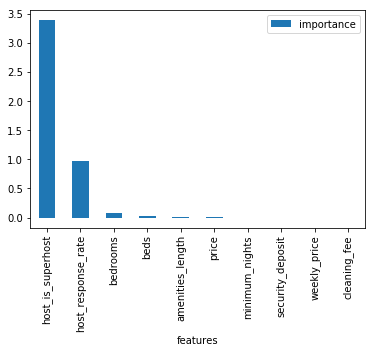

In [140]:
%matplotlib inline
plt.figure(figsize=(15,8))
coefficients.sort_values(by='importance',ascending=False)[:10].plot(x='features', y='importance', kind='bar')

In [135]:
#Getting the error on the test dataset to see how linear regression is performing on this dataset
from sklearn import metrics
Y_predict = lm.predict(X_test)
error = np.sqrt(metrics.mean_squared_error(Y_test, Y_predict))
error

6.1015317019418545

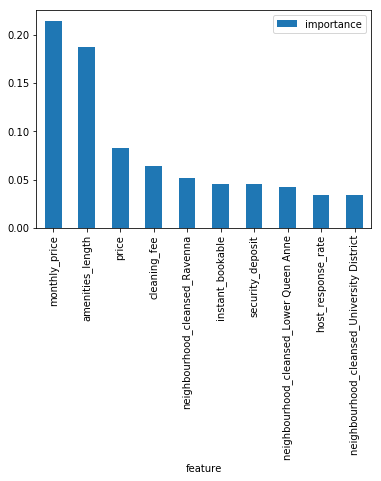

In [136]:
#Let us apply Decision Tree
%matplotlib inline
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

#Make the decision tree
decisiontree = tree.DecisionTreeClassifier(
    class_weight="balanced",
    min_weight_fraction_leaf=0.01,)
decisiontree = decisiontree.fit(X_train,Y_train)

#Look at outputs
importances = decisiontree.feature_importances_
feat_names = X_train.columns
tree_result = pd.DataFrame({'feature': feat_names, 'importance': importances})
tree_result.sort_values(by='importance',ascending=False)[:10].plot(x='feature', y='importance', kind='bar')

In [137]:
#Let us test our decision tree regressor to see how it performs on our test dataset
Y_predict = decisiontree.predict(X_test)
error = np.sqrt(metrics.mean_squared_error(Y_test, Y_predict))
error

18.388801796094899

In [138]:
#As we can see that the error for linear reegression is less than that of decision tree regressor,we will take the important 
#features of linear regression as the ones that determine the rating of a listing
#Hence,the most importnat features are:
# 1) host_is_superhost
# 2)host_response_rate
#3) Number of beds and bedrooms in a listing
# 4) Number of amenities being provided by the listing 